In [1]:
import torch
import torch.nn as nn
import time

In [2]:
from src.datasources.unityeyes import UnityEyesDataset
from src.configs import cfg
import src.models.gaze_hrnet as gaze_hrnet

In [3]:
dataset_path = 'E:/Datasets/UnityEyes_Windows/480x640'
u_dataset = UnityEyesDataset(dataset_path, cfg, is_train=True, random_difficulty=True, generate_heatmaps=True)
print(u_dataset.__len__())

1000000


In [4]:
from torch.utils.data import DataLoader
u_dataloader = DataLoader(u_dataset, shuffle=True, batch_size=16, num_workers=4)

In [5]:
start = time.perf_counter()
i = 0
for one_batch in u_dataloader:
    u_onebatch = one_batch
    i += 1
    if i == 1:
        break
print(time.perf_counter() - start)

9.674751699999888


tensor([-0.2675, -0.4291])
tensor([[20.5248, 30.7221],
        [26.3021, 25.2982],
        [53.2779, 24.6481],
        [79.9143, 29.8046],
        [88.8533, 32.4775],
        [79.6322, 41.9057],
        [52.1362, 47.9843],
        [29.2633, 39.8366],
        [48.9214, 34.7679],
        [54.9482, 22.5556],
        [66.9559, 17.3955],
        [77.9106, 22.3102],
        [81.3952, 34.4209],
        [75.3684, 46.6332],
        [63.3607, 51.7934],
        [52.4059, 46.8787],
        [66.7594, 35.6501],
        [50.9043, 25.2035]])
tensor(39.5163)


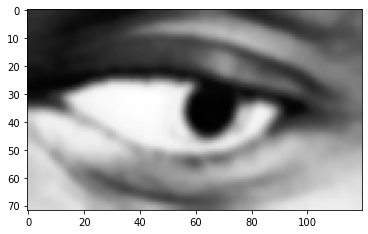

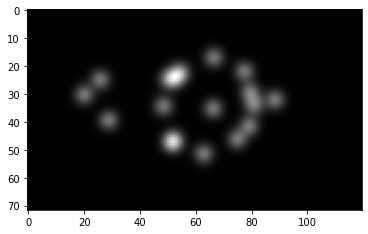

In [6]:
import matplotlib.pyplot as plt 
n = 9
plt.figure()
plt.imshow(u_onebatch['eye'][n][0], cmap='gray')
heatmap = torch.zeros((72, 120))
for i in range(18):
    heatmap += u_onebatch['heatmaps'][n][i]
    # plt.figure()
    # plt.imshow(u_onebatch['heatmaps'][n][i], cmap='gray')
plt.figure()
plt.imshow(heatmap, cmap='gray')
print(u_onebatch['gaze'][n])
print(u_onebatch['landmarks'][n])
print(u_onebatch['radius'][n])

In [7]:
g = gaze_hrnet.get_gaze_net(cfg, True)

In [8]:
pytorch_total_params = sum(p.numel() for p in g.parameters() if p.requires_grad)
pytorch_total_params

5400423

In [9]:
import cv2 as cv
import numpy as np

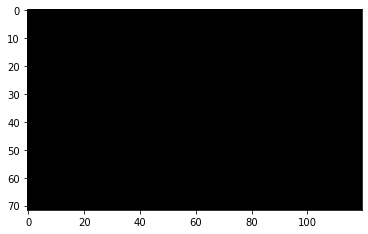

In [10]:
heatmap = heatmap.detach().numpy()
frame_2d = np.zeros((72, 120))
landmarks = u_onebatch['landmarks'][n].detach().numpy()
interior_landmarks = landmarks[0:8]
iris_landmarks = landmarks[8:16]
iris_centre = landmarks[-2]
eyeball_centre = landmarks[-1]
plt.imshow(frame_2d, cmap='gray')

In [11]:
# Should convert coordinates dtype to np.int32 or np.uint32.
cv.polylines(frame_2d, np.int32([interior_landmarks]), isClosed=True, color=(1, 1, 1), thickness=2)
cv.polylines(frame_2d, np.array([iris_landmarks], dtype='int32'), isClosed=True, color=(1, 1, 1), thickness=2)
cv.arrowedLine(frame_2d, tuple(np.int32(eyeball_centre)), tuple(np.int32(iris_centre)), color=(1, 1, 1), thickness=2, line_type=cv.FILLED, tipLength=0.2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1.0

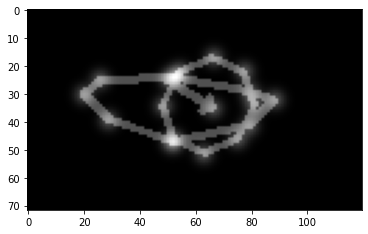

In [12]:
plt.imshow(frame_2d + heatmap, cmap='gray')
np.max(frame_2d)

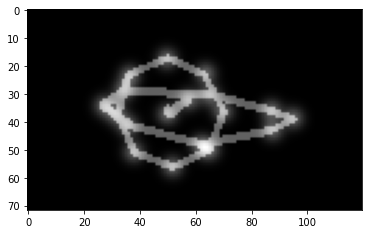

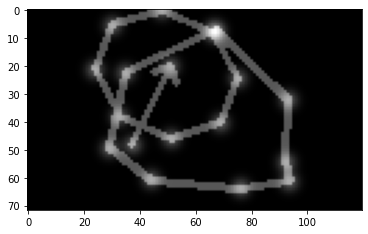

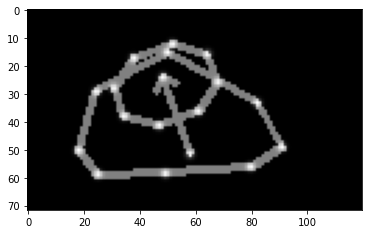

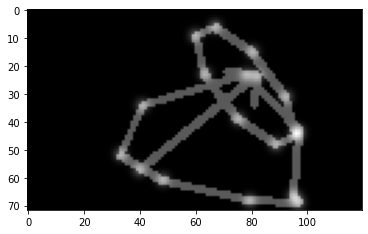

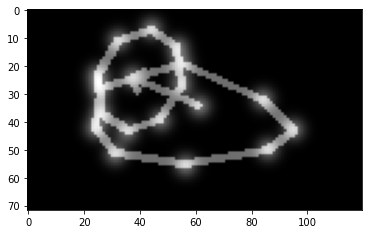

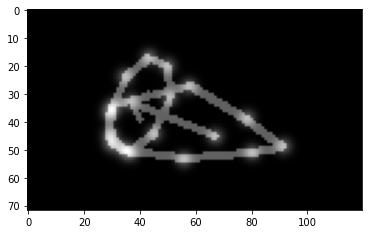

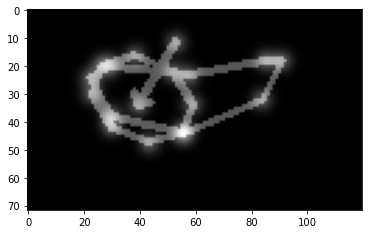

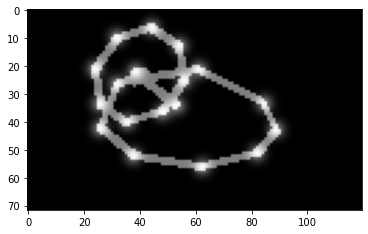

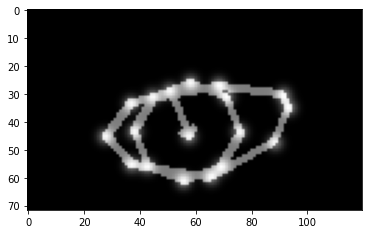

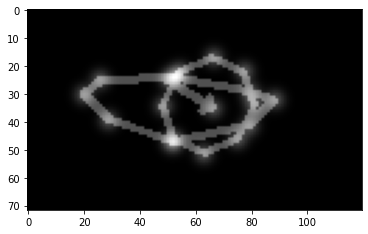

In [13]:
for i in range(10):
    heatmap = torch.zeros((72, 120))
    for j in range(18):
        heatmap += u_onebatch['heatmaps'][i][j]
    heatmap = heatmap.detach().numpy()
    frame_2d = np.zeros((72, 120))
    landmarks = u_onebatch['landmarks'][i].detach().numpy()
    interior_landmarks = landmarks[0:8]
    iris_landmarks = landmarks[8:16]
    iris_centre = landmarks[-2]
    eyeball_centre = landmarks[-1]
    # Should convert coordinates dtype to np.int32 or np.uint32.
    cv.polylines(frame_2d, np.int32([interior_landmarks]), isClosed=True, color=(1, 1, 1), thickness=2)
    cv.polylines(frame_2d, np.array([iris_landmarks], dtype='int32'), isClosed=True, color=(1, 1, 1), thickness=2)
    cv.arrowedLine(frame_2d, tuple(np.int32(eyeball_centre)), tuple(np.int32(iris_centre)), color=(1, 1, 1), thickness=2, line_type=cv.FILLED, tipLength=0.2)
    plt.figure()
    plt.imshow(frame_2d + heatmap, cmap='gray')